In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [55]:
predictor = TimeSeriesPredictor.load('C:\\Develop\\HPO\\TemporalFusionTransformer2')

In [56]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_week.csv')
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0


In [57]:
# Create a new df of the item_id equal to IT01 
df_IT = df[df['item_id'] == 'IT01']

In [58]:
# Calcola la somma delle colonne ACT
act_sum = df_IT[['ACT01', 'ACT03', 'ACT04', 'ACT07', 'ACT09', 'ACT13', 'ACT15', 'ACT17', 'ACT32', 'ACT44']].sum()

# Stampare il risultato
print("Somma delle colonne ACT:")
print(act_sum)


Somma delle colonne ACT:
ACT01     73515.0
ACT03     16003.0
ACT04         0.0
ACT07     47411.0
ACT09     13550.0
ACT13     11661.0
ACT15     47411.0
ACT17     16085.0
ACT32    131610.0
ACT44     35752.0
dtype: float64


In [59]:
# Drop ACT04 column
#df_IT = df_IT.drop(columns=['ACT04'])

In [60]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df_IT[df_IT['timestamp'] <= '2022-04-30']
test_data = df_IT[df_IT['timestamp'] > '2022-04-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df_IT.shape[0])
print(test_data.shape[0] / df_IT.shape[0])

0.6976744186046512
0.3023255813953488


In [61]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

target   ACT01  ACT03  ACT04  ACT07  ACT09  ACT13   ACT15  \
item_id timestamp                                                               
IT01    2019-12-30  7613.0  1228.0   87.0    0.0  195.0  188.0   32.0  1817.0   
        2020-01-06   390.0    87.0   63.0    0.0    5.0    8.0    0.0     0.0   
        2020-01-13   702.0   161.0   10.0    0.0   14.0    0.0   49.0     1.0   
        2020-01-20   941.0   437.0  143.0    0.0   86.0   67.0  110.0     0.0   
        2020-01-27  1470.0   403.0  457.0    0.0  178.0  108.0   48.0     7.0   

                     ACT17   ACT32  ACT44  
item_id timestamp                          
IT01    2019-12-30  1255.0  2811.0    0.0  
        2020-01-06     0.0   227.0    0.0  
        2020-01-13     0.0   467.0    0.0  
        2020-01-20     0.0    98.0    0.0  
        2020-01-27     0.0   269.0    0.0

In [62]:
# Convert test_data to TimeSeriesDataFrame
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

target  ACT01  ACT03  ACT04  ACT07  ACT09  ACT13  ACT15  \
item_id timestamp                                                             
IT01    2022-05-02  4074.0  788.0   29.0    0.0  396.0   30.0  111.0  515.0   
        2022-05-09   756.0  137.0    0.0    0.0  124.0    0.0    0.0    0.0   
        2022-05-16   439.0  153.0   27.0    0.0   76.0    2.0   24.0    0.0   
        2022-05-23  2078.0  452.0   28.0    0.0  387.0   57.0  158.0  506.0   
        2022-05-30  3883.0  912.0  198.0    0.0  514.0  178.0  261.0   14.0   

                    ACT17   ACT32  ACT44  
item_id timestamp                         
IT01    2022-05-02  145.0  2060.0    0.0  
        2022-05-09    0.0   495.0    0.0  
        2022-05-16    0.0   157.0    0.0  
        2022-05-23  138.0   352.0    0.0  
        2022-05-30   10.0  1796.0    0.0

In [63]:
# Make prediction on training data
predictions = predictor.predict(train_data, random_seed=42)
predictions.head()

data with frequency 'None' has been resampled to frequency 'W-MON'.


data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.


mean          0.1          0.2          0.3  \
item_id timestamp                                                        
IT01    2022-05-02  4305.291992  3867.474854  4015.437500  4137.951660   
        2022-05-09  1312.954468   879.330261  1040.792603  1181.614868   
        2022-05-16   384.211395    35.685654   155.342453   288.513824   
        2022-05-23  1366.767578  1031.512085  1161.250000  1294.218628   
        2022-05-30  4125.061035  3739.637207  3877.344971  3998.391113   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
IT01    2022-05-02  4254.642090  4305.291992  4379.274414  4413.108887   
        2022-05-09  1283.333496  1312.954468  1386.355835  1422.780029   
        2022-05-16   361.640289   384.211395   458.462036   502.722076   
        2022-05-23  1344.259521  1366.767578  1429.947754  1463.209106   
        2022-05-30  4106.875000  4125.061035  4172.916016  4219.418457   

                            0.8          0.9  
item_id timestamp                             
IT01    2022-05-02  4536.662109  4726.483887  
        2022-05-09  1538.193481  1720.553467  
        2022-05-16   582.468811   731.764648  
        2022-05-23  1563.948730  1687.507202  
        2022-05-30  4297.101562  4431.296387

In [64]:
predictor.leaderboard(test_data)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble_FULL,-0.108039,NaN,0.311769,NaN,5.796612,22
1,WeightedEnsemble,-0.108039,-0.445797,0.302816,0.266395,5.796612,11
2,TemporalFusionTransformer\6774d0d5_FULL,-0.145122,NaN,0.056639,NaN,1768.984193,15
3,TemporalFusionTransformer\6774d0d5,-0.145122,-0.492351,0.054512,0.028136,7829.735518,4
4,TemporalFusionTransformer\1fd58588_FULL,-0.169063,NaN,0.064428,NaN,1214.613141,14
5,TemporalFusionTransformer\1fd58588,-0.169063,-0.535108,0.056484,0.039388,7462.380405,3
6,TemporalFusionTransformer\8e9defd9_FULL,-0.185009,NaN,0.077563,NaN,541.719119,21
7,TemporalFusionTransformer\8e9defd9,-0.185009,-0.554369,0.057601,0.018245,3268.269732,10
8,TemporalFusionTransformer\01ee4816_FULL,-0.186290,NaN,0.074529,NaN,1229.878255,13
9,TemporalFusionTransformer\01ee4816,-0.186290,-0.592387,0.061671,0.075858,7166.129652,2


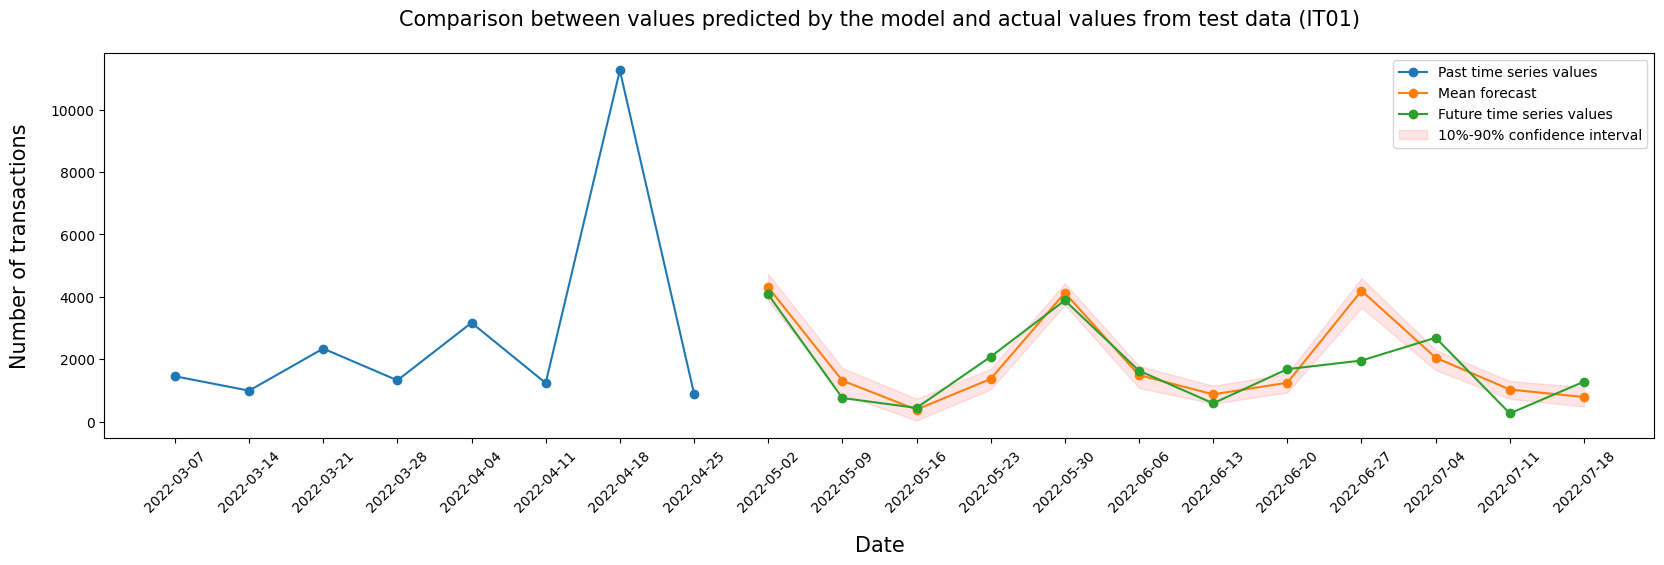

In [97]:
plt.figure(figsize=(20, 5))
plt.title("Comparison between values predicted by the model and actual values from test data (IT01)", pad=20, fontsize=15)

item_id = "IT01"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:12]

# Get the dates for each observation
all_dates = list(y_past.index[-8:]) + list(y_test.index)
all_ticks = range(len(all_dates))

# Set the x-axis range for past and future
past_ticks = range(8)
future_ticks = range(8, len(all_dates))

plt.plot(past_ticks, y_past[-8:], label="Past time series values", marker='o', linestyle='-')
plt.plot(future_ticks, y_pred["mean"], label="Mean forecast", marker='o', linestyle='-')
plt.plot(future_ticks, y_test, label="Future time series values", marker='o', linestyle='-')

# Set the x-axis range for fill_between
fill_ticks = range(8, len(y_pred.index) + 8)

plt.fill_between(
    fill_ticks, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)

# Set x-axis labels with dates without time
date_labels = [date.strftime("%Y-%m-%d") for date in all_dates]
plt.xticks(all_ticks, date_labels, rotation=45)

# Add label for x-axis and y-axis
plt.xlabel("Date", fontsize=15, labelpad=15)
plt.ylabel("Number of transactions", fontsize=15, labelpad=15)

plt.legend()
plt.show()

In [72]:
# Debug per verificare le date estratte
print("Selected dates:")
print(list(y_past.index[-4:]))
print(list(y_test.index))

Selected dates:
[Timestamp('2022-04-04 00:00:00'), Timestamp('2022-04-11 00:00:00'), Timestamp('2022-04-18 00:00:00'), Timestamp('2022-04-25 00:00:00')]
[Timestamp('2022-05-02 00:00:00'), Timestamp('2022-05-09 00:00:00'), Timestamp('2022-05-16 00:00:00'), Timestamp('2022-05-23 00:00:00'), Timestamp('2022-05-30 00:00:00'), Timestamp('2022-06-06 00:00:00'), Timestamp('2022-06-13 00:00:00'), Timestamp('2022-06-20 00:00:00'), Timestamp('2022-06-27 00:00:00'), Timestamp('2022-07-04 00:00:00'), Timestamp('2022-07-11 00:00:00'), Timestamp('2022-07-18 00:00:00')]


In [68]:
# Sum all value of mean forecast of predictions where item_id is IT01
predictions.loc['IT01']['mean'].sum()

23159.193

In [ ]:
# Sum all value of target of test_data 
test_data.loc['IT01']['target'][:12].sum()

21311.0

In [ ]:
# Print first 12 rows of test_data
test_data.loc['IT01']['target'][:12]

timestamp
2022-05-02    4074.0
2022-05-09     756.0
2022-05-16     439.0
2022-05-23    2078.0
2022-05-30    3883.0
2022-06-06    1630.0
2022-06-13     585.0
2022-06-20    1681.0
2022-06-27    1956.0
2022-07-04    2687.0
2022-07-11     263.0
2022-07-18    1279.0
Name: target, dtype: float64

In [ ]:
# Calculate difference betweend each prediction and actual value of test_data
diff = predictions.loc['IT01']['mean'] - test_data.loc['IT01']['target'][:12]
diff

timestamp
2022-05-02     231.291992
2022-05-09     556.954468
2022-05-16     -54.788605
2022-05-23    -711.232422
2022-05-30     242.061035
2022-06-06    -139.766846
2022-06-13     287.508789
2022-06-20    -436.220581
2022-06-27    2238.273926
2022-07-04    -638.471680
2022-07-11     764.752075
2022-07-18    -492.167175
dtype: float64

In [ ]:
# Show model names
predictor.model_names()

['TemporalFusionTransformer\\521f698d',
 'TemporalFusionTransformer\\01ee4816',
 'TemporalFusionTransformer\\1fd58588',
 'TemporalFusionTransformer\\6774d0d5',
 'TemporalFusionTransformer\\50f07b04',
 'TemporalFusionTransformer\\51d2f5e2',
 'TemporalFusionTransformer\\05b65032',
 'TemporalFusionTransformer\\cbfff631',
 'TemporalFusionTransformer\\daa48ead',
 'TemporalFusionTransformer\\8e9defd9',
 'WeightedEnsemble',
 'TemporalFusionTransformer\\521f698d_FULL',
 'TemporalFusionTransformer\\01ee4816_FULL',
 'TemporalFusionTransformer\\1fd58588_FULL',
 'TemporalFusionTransformer\\6774d0d5_FULL',
 'TemporalFusionTransformer\\50f07b04_FULL',
 'TemporalFusionTransformer\\51d2f5e2_FULL',
 'TemporalFusionTransformer\\05b65032_FULL',
 'TemporalFusionTransformer\\cbfff631_FULL',
 'TemporalFusionTransformer\\daa48ead_FULL',
 'TemporalFusionTransformer\\8e9defd9_FULL',
 'WeightedEnsemble_FULL']

In [ ]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\1fd58588")  # provide the model name here
model.get_user_params()

{'hidden_dim': 32,
 'variable_dim': 128,
 'num_heads': 4,
 'dropout_rate': 0.2,
 'max_epochs': 200,
 'batch_size': 64,
 'lr': 0.01,
 'early_stopping_patience': 10}

In [ ]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\50f07b04")  # provide the model name here
model.get_user_params()

{'hidden_dim': 32,
 'variable_dim': 128,
 'num_heads': 4,
 'dropout_rate': 0.4,
 'max_epochs': 150,
 'batch_size': 64,
 'lr': 0.01,
 'early_stopping_patience': 10}

In [ ]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\51d2f5e2")  # provide the model name here
model.get_user_params()

{'hidden_dim': 32,
 'variable_dim': 128,
 'num_heads': 4,
 'dropout_rate': 0.3,
 'max_epochs': 100,
 'batch_size': 64,
 'lr': 0.01,
 'early_stopping_patience': 10}

In [ ]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\6774d0d5")  # provide the model name here
model.get_user_params()

{'hidden_dim': 32,
 'variable_dim': 128,
 'num_heads': 4,
 'dropout_rate': 0.2,
 'max_epochs': 100,
 'batch_size': 64,
 'lr': 0.01,
 'early_stopping_patience': 10}

In [ ]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\daa48ead")  # provide the model name here
model.get_user_params()

{'hidden_dim': 32,
 'variable_dim': 128,
 'num_heads': 4,
 'dropout_rate': 0.4,
 'max_epochs': 150,
 'batch_size': 64,
 'lr': 0.01,
 'early_stopping_patience': 10}